In [226]:
import numpy as np
from scipy.stats import *
from sympy import *
from math import factorial
from IPython.display import Math

$$
\nu_k(X) = \mathbb{E}(X^k) - \text{Начальный момент к-го порядка}\\
\mu_k(X) = \mathbb{E}[(X-\mathbb{E}(X))^k] - \text{Центральный момент к-го порядка}\\
\widehat{\nu_k}(X) = \frac{1}{n}\sum_{i=1}^n X^k_i - \text{Выборочный начальный момент к-го порядка}\\
\widehat{\mu_k}(X) = \frac{1}{n}\sum_{i=1}^n (X_i - \overline{X})^k - \text{Выборочный центральный момент к-го порядка}\\
$$

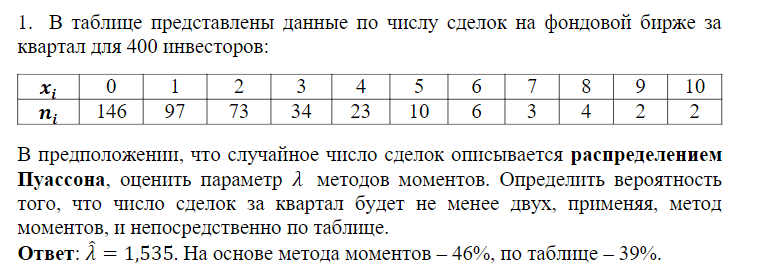

$$
\lambda = \Theta
$$

In [227]:
xi = np.arange(11)
ni = np.array([146,97,73,34,23,10,6,3,4,2,2])

lambda_hat = np.multiply(xi,ni).sum()/ni.sum()
print('lambda = ',lambda_hat)
print()

lambda =  1.535



$$P(X=k) = \frac{\lambda^k}{k!} \cdot e^{-\lambda}$$

In [228]:
1 - poisson(lambda_hat).cdf(1)

0.4538198228847039

In [229]:
p = lambda k,lambda_hat: lambda_hat**k/factorial(k) * np.exp(-lambda_hat)
1 - p(1,lambda_hat)-p(0,lambda_hat)

0.4538198228847039

In [230]:
1 - ni[0]/ni.sum() - ni[1]/ni.sum()

0.3925

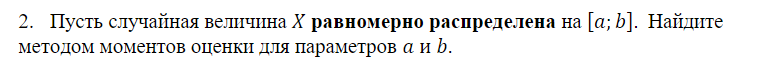

$$
\mathbb{E}(X) = \frac{a+b}{2}\\
\mathbb{Var}(X) = \frac{(b-a)^2}{12}\\~\\
\nu_1(X) = 
$$

In [231]:
a,b,x_,x2_= symbols('a,b,x_,x2_')
f1 = (a+b)/2 - x_
f2 = (a**2+a*b+b**2)/3 - x2_
solve((f1, f2), (a, b))

[(x_ - sqrt(3)*sqrt(x2_ - x_**2), x_ + sqrt(3)*sqrt(x2_ - x_**2)),
 (x_ + sqrt(3)*sqrt(x2_ - x_**2), x_ - sqrt(3)*sqrt(x2_ - x_**2))]

In [232]:
a,b,x_,x2_= symbols('a,b,x_,x2_')
f1 = (a+b)/2 - x_
f2 = (b -a)**2/12 - (x2_-x_**2)
solve((f1, f2), (a, b))

[(x_ - sqrt(3)*sqrt(x2_ - x_**2), x_ + sqrt(3)*sqrt(x2_ - x_**2)),
 (x_ + sqrt(3)*sqrt(x2_ - x_**2), x_ - sqrt(3)*sqrt(x2_ - x_**2))]

В обоих случаях выбираем первое решение, так как $a < b$

In [233]:
a,b = (x_ - sqrt(3)*sqrt(x2_ - x_**2), x_ + sqrt(3)*sqrt(x2_ - x_**2))
display(Math(r'\hat{a} = ' + latex(a)))
display(Math(r'\hat{b} = ' + latex(b)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

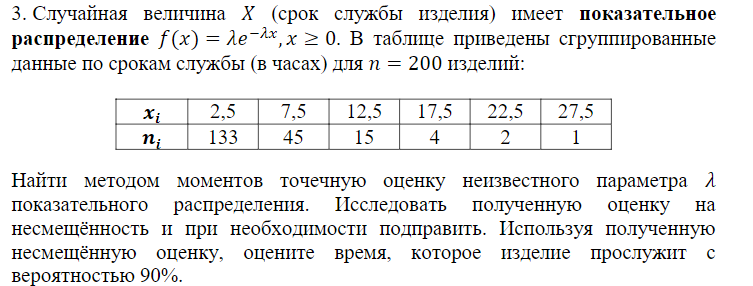

$$
\mathbb{E}(X) = \frac{1}{\lambda}\\
\nu_1(X) = \hat{\nu_1}(X)\\
\frac{1}{\hat{\lambda}} = \overline{X} \Rightarrow \hat{\lambda} = \frac{1}{\overline{X}}\\
\text{Известно, что:}\\
T = X_1+\dots+X_n \sim \Gamma(\Theta, n)\\
f_T(t) = \frac{\Theta^n}{(n-1)!} t^{n-1} e^{-\Theta t}, \text{ при } t>0\\
T = n \frac{1}{n} (X_1 + \dots + X_n) = n\overline{x}\\
\Downarrow\\
\overline{X} = \frac{T}{n}\\
E(\Theta) = E(\hat{\lambda}) = E\left(\frac{1}{\overline{x}}\right) = n E\left(\frac{1}{T}\right)=\\
= n\int_0^\infty \frac{1}{t} \frac{\Theta^n}{(n-1)!} t^{n-1} e^{-\Theta t} dt = \left\{\begin{array}{c}
x=\Theta t\\
t = \frac{x}{\Theta}\\
dt = \frac{1}{\Theta}dx
\end{array}\right\} =
 \frac{n \Theta}{(n-1)!} \int_0^\infty x^{n-1} e^{-x} dx = \\~\\= \frac{n \Theta}{(n-1)!} \Gamma(n-1) = \frac{n \Theta}{(n-1)!} \frac{\Gamma(n) }{(n-1)} = \left\{\begin{array}{c}
x=\Theta t\\
dx = \Theta dt
\end{array}\right\} = \frac{n \Theta}{(n-1) \cdot (n-1)! } \int_0^\infty t^{n-1} \Theta^{n-1} e^{-\Theta t} dt =\\~\\
= \frac{n \Theta}{(n-1) } \int_0^\infty t^{n-1} \frac{\Theta^{n-1}}{(n-1)!} e^{-\Theta t} dt = \frac{n \Theta}{n-1} \neq \Theta = \lambda
$$

In [234]:
xi = np.array([2.5,7.5,12.5,17.5,22.5,27.5])
ni = np.array([133,45,15,4,2,1])
n = ni.sum()

lambda_hat = (n-1)/n/(np.multiply(xi,ni).sum()/n )
lambda_hat

0.199

In [235]:
expon(1/lambda_hat).ppf(0.9)

7.327710721134749

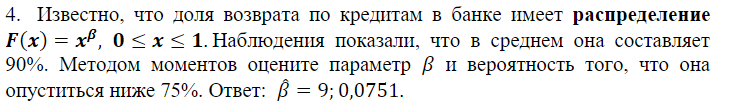

$$
F(x) = x^\beta\\
x \in [0;1]\\
\nu_1(X) = \mathbb{E}(X) = \int_0^1 x\cdot \beta\cdot x^{\beta-1} dx = \beta \int_0^1 x^\beta dx = \frac{\beta \cdot x^{\beta+1}}{\beta-1} \Bigg|_0^1= \frac{\beta }{\beta-1}\\
\frac{\hat{\beta} }{\hat{\beta} - 1} = \overline{X}\\
\hat{\beta} = \frac{\overline{X}}{1-\overline{X}}\\
\overline{X} = 0,9\\\Downarrow\\ \hat{\beta} = 9,\\ P(X<0,75)=0,75^9\\

$$

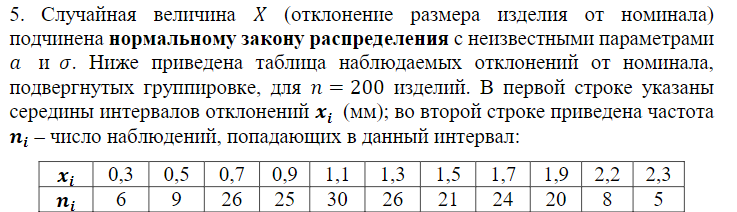
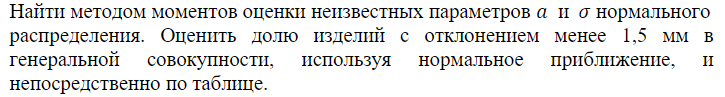

$$
X\sim \N(a,\sigma^2)\\
\mathbb{E}(X) = a = \Theta_1\\
\mathbb{Var}(X) = \sigma^2 = \Theta_2\\
\begin{cases}
\nu_1(X) = \hat{\nu_1(X)}\\
\mu_2(X) = \hat{\mu_2(X)}
\end{cases}\\
\Downarrow\\
\begin{cases}
\hat{a }= \overline{X}\\
\hat{\sigma^2} = \hat{\sigma^2}_x
\end{cases}\\
$$

In [236]:
xi = np.array([0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.2,2.3])
ni = np.array([6,9,26,25,30,26,21,24,20,8,5])

n = ni.sum()

x_ = (np.multiply(xi,ni)/n).sum()
x_

1.2660000000000002

In [237]:
var_ = (ni*(xi-x_)**2).sum()/n
var_

0.247244

In [238]:
u = xi[xi<1.5]
(u*ni[:u.size]/n).sum()

0.5690000000000001

In [239]:
norm(x_,var_**0.5).cdf(1.5)

0.6810372040565851

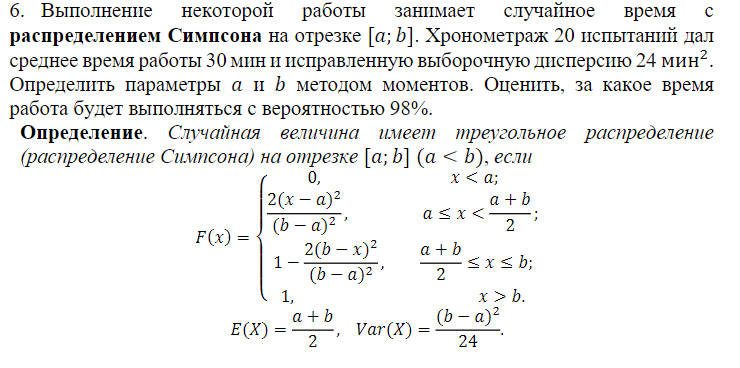

In [240]:
a,b,x_,x2_= symbols('a,b,x_,x2_')
f1 = (a+b)/2 - x_
f2 = (b -a)**2/24 - (x2_-x_**2)
solved = solve((f1, f2), (a, b))
solved

[(x_ - sqrt(6)*sqrt(x2_ - x_**2), x_ + sqrt(6)*sqrt(x2_ - x_**2)),
 (x_ + sqrt(6)*sqrt(x2_ - x_**2), x_ - sqrt(6)*sqrt(x2_ - x_**2))]

In [241]:
a,b = solved[0]
display(Math(r'\hat{a} = ' + latex(a)))
display(Math(r'\hat{b} = ' + latex(b)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

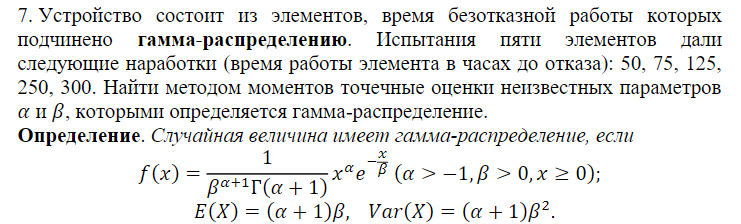

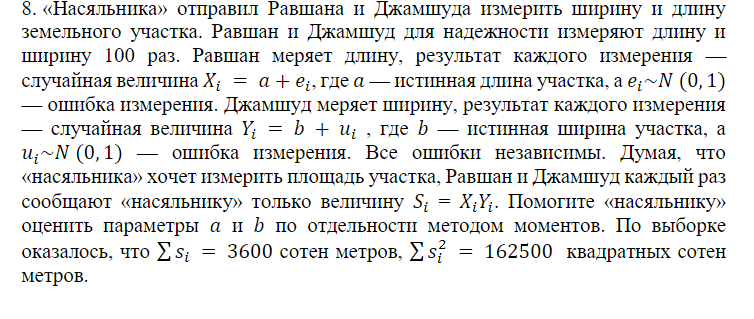

$$
S_i = X_i\cdot Y_i\\
\mathbb{E}(S_i)  = a b\\
\sum s_i = 3600\\
\sum s_i^2 = 162500\\
\mathbb{E}(X_i^2) = \mathbb{Var}(X_i) + \mathbb{E}(X_i)^2 = 1+a^2\\
\mathbb{E}(Y_i^2) = \mathbb{Var}(Y_i) + \mathbb{E}(Y_i)^2 = 1+b^2\\
\Downarrow\\
\begin{cases}
\hat{a} \hat{b} = \frac{3600}{100}\\
(1+\hat{a}^2)(1+\hat{b}^2) = \frac{162500}{100}\\
\end{cases}
$$

# ДЗ

In [ ]:
import numpy as np
from scipy.stats import *
from sympy import *

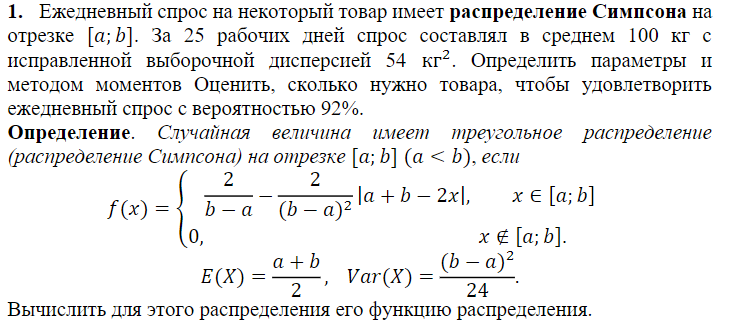

In [262]:
a, b,x = symbols('a, b, x', real=True)

E = (a+b)/2 - 100
Var = (b-a)**2/24 - 54
sol1 = solve([E,Var],[a,b],dict=True)[0] # В первом решении a < b

a, b = sol1.values()

triang.ppf(0.92, 0.5, int(a), int(b-a))

110.8

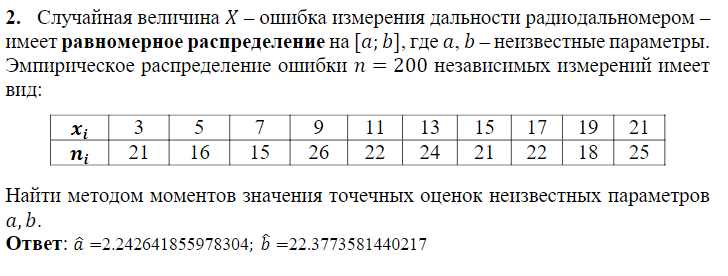

In [281]:
xi = np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
ni = np.array([21, 16, 15, 26, 22, 24, 21, 22, 18, 25])
n = ni.sum()

a,b = symbols('a b',real=True)

mu = (xi*ni/n).sum()
var = ((xi-mu)**2*ni/n).sum()

f1 = (a+b)/2 - mu
f2 = (b-a)**2 / 12 - var


solve([f1,f2],[a,b], dict=True)[0]

{a: 2.51482559622316, b: 22.1708886894911}

Разница ответов получилачь из-за того, что задание предполагает, что измерений $n = 200$, когда на самом деле $n=210$